#Prueba con Fsolve

In [11]:
import numpy as np
import scipy.optimize as opt

def alcance_maximo(theta, v0, b, g=9.8):

  v0x = v0 * np.cos(theta)
  v0y = v0 * np.sin(theta)

  def ecuacion_R(R):
    return (g/b + v0y) * (R / v0x) + (g / b**2) * np.log(1 - (R * b / v0x))

  # fsolve
  R_sol = opt.fsolve(ecuacion_R, v0**2 / g)

  return R_sol[0]

theta = np.radians(45)  # Convertimos grados a radianes
v0 = 5
b = 0.001
R = alcance_maximo(theta, v0, b)

print(f"El alcance máximo es R = {R:.2f} m")


El alcance máximo es R = 2.55 m


# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def función(R, theta, v0, b, g):
  v0x = v0 * np.cos(theta)
  v0y = v0 * np.sin(theta)
  term1 = ((g/b)+v0y)*(R/v0x)
  term2 = (g/b**2)*np.log(1-(R*b/v0x))

  return term1 + term2

#Trayectorias

In [4]:
def rapidez(v0, theta):
  v0x = v0 * np.cos(theta)
  v0y = v0 * np.sin(theta)

  return v0x, v0y

def posx_(t, b, v0x):
  return (v0x / b) * (1 - np.exp(-b * t))

def posy_(t, b, v0y):
  T1 = (1 / b) * ((g / b) + v0y) * (1 - np.exp(-b * t))
  T2 = (g / b) * t
  return T1 - T2

In [5]:
t = np.linspace(0,1,100)
g = 9.8
v0 = 5
b = 0.001
theta = np.pi / 4
v0x, v0y = rapidez(v0, theta)
X = posx_(t, b, v0x)
Y = posy_(t, b, v0y)

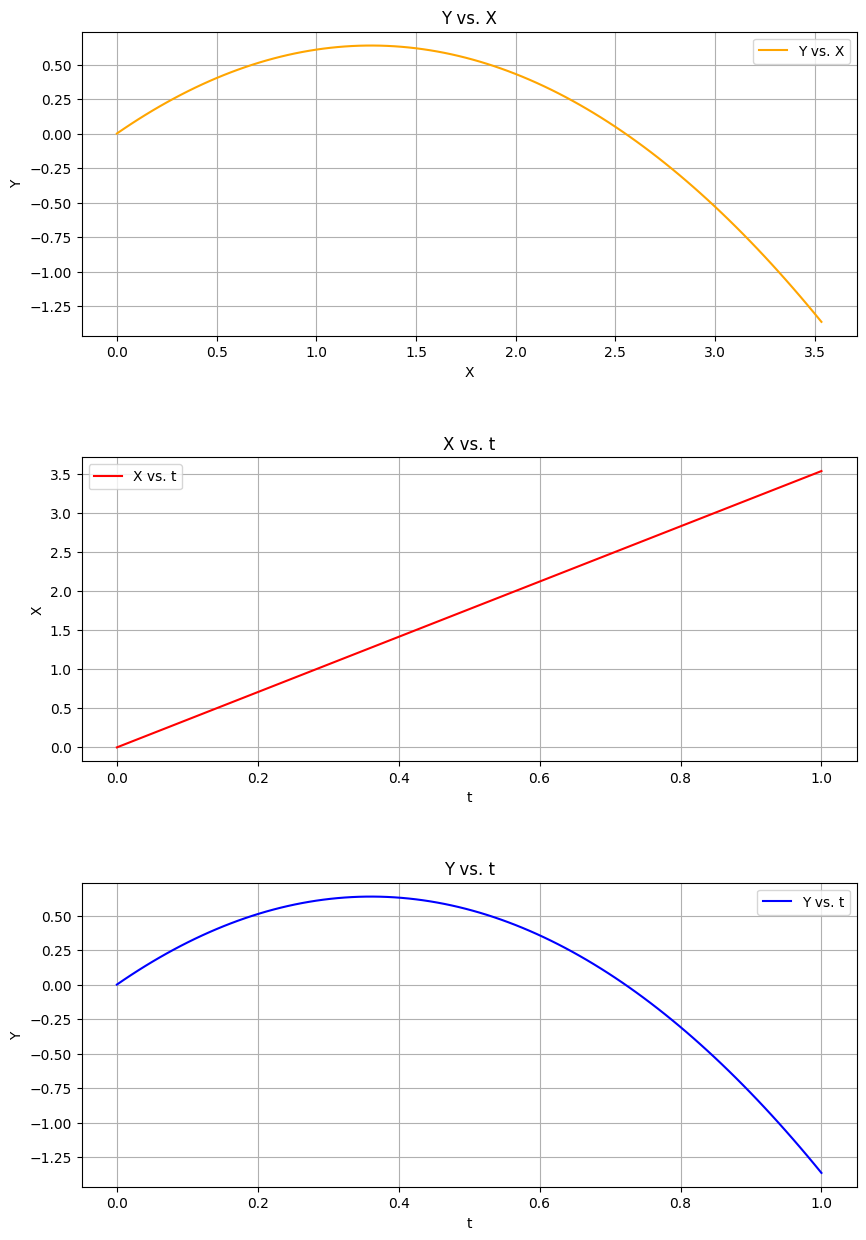

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
plt.subplots_adjust(hspace=0.4)

# Gráfica de la hora de salida del sol
axs[0].plot(X, Y, color='orange', label="Y vs. X")
axs[0].set_title("Y vs. X")
axs[0].set_ylabel("Y")
axs[0].set_xlabel("X")
axs[0].grid(True)
axs[0].legend()

# Gráfica de la hora de puesta del sol
axs[1].plot(t, X, color='red', label="X vs. t")
axs[1].set_title("X vs. t")
axs[1].set_ylabel("X")
axs[1].set_xlabel("t")
axs[1].grid(True)
axs[1].legend()

# Gráfica del tiempo de visibilidad del sol
axs[2].plot(t, Y, color='blue', label="Y vs. t")
axs[2].set_title("Y vs. t")
axs[2].set_ylabel("Y")
axs[2].set_xlabel("t")
axs[2].grid(True)
axs[2].legend()

plt.show()

#Bisección

In [7]:
import numpy as np

def alcance_maximo_biseccion(theta, v0, b, g=9.8, tol=1e-6, max_iter=100):

    v0x = v0 * np.cos(theta)
    v0y = v0 * np.sin(theta)


    def ecuacion_R(R):
        return (g/b + v0y) * (R / v0x) + (g / b**2) * np.log(1 - (R * b / v0x))

    a, b_val = 0, v0**2 / g  # Sin resistencia, R ≈ v0²/g

    for _ in range(max_iter):
        R_mid = (a + b_val) / 2
        f_mid = ecuacion_R(R_mid)

        if abs(f_mid) < tol:
            return R_mid

        if ecuacion_R(a) * f_mid < 0:
            b_val = R_mid
        else:
            a = R_mid

    return (a + b_val) / 2

theta = np.radians(45)
v0 = 5
b = 0.001
R_biseccion = alcance_maximo_biseccion(theta, v0, b)

print(f"Alcance máximo (Bisección): R = {R_biseccion:.2f} m")

Alcance máximo (Bisección): R = 2.55 m


#Newton-Raphson

In [8]:
def alcance_maximo_newton(theta, v0, b, g=9.8, tol=1e-6, max_iter=100):

    v0x = v0 * np.cos(theta)
    v0y = v0 * np.sin(theta)

    def ecuacion_R(R):
        return (g/b + v0y) * (R / v0x) + (g / b**2) * np.log(1 - (R * b / v0x))

    def derivada_R(R):
        return (g/b + v0y) / v0x + (g / (b**2 * (1 - (R * b / v0x)))) * (-b / v0x)

    R = v0**2 / g

    for _ in range(max_iter):
        f_R = ecuacion_R(R)
        f_prime_R = derivada_R(R)

        if abs(f_R) < tol:
            return R

        R -= f_R / f_prime_R

    return R

# Ejemplo de uso:
R_newton = alcance_maximo_newton(theta, v0, b)

print(f"Alcance máximo (Newton-Raphson): R = {R_newton:.2f} m")

Alcance máximo (Newton-Raphson): R = 2.55 m


#Punto Fijo

In [9]:
def alcance_maximo_punto_fijo(theta, v0, b, g=9.8, tol=1e-6, max_iter=100):

    v0x = v0 * np.cos(theta)
    v0y = v0 * np.sin(theta)

    def g2(R):
        return - (g / b**2) * np.log(1 - (R * b / v0x)) * (v0x / (g / b + v0y))

    R = v0**2 / g

    for _ in range(max_iter):
        R_new = g2(R)
        if abs(R_new - R) < tol:
            return R_new
        R = R_new

    return R

# Ejemplo de uso:
R_punto_fijo = alcance_maximo_punto_fijo(theta, v0, b)

print(f"Alcance máximo (Punto Fijo): R = {R_punto_fijo:.2f} m")

Alcance máximo (Punto Fijo): R = 2.55 m


#Secante

In [10]:
import numpy as np

def alcance_maximo_secante(theta, v0, b, g=9.8, tol=1e-6, max_iter=100):

    v0x = v0 * np.cos(theta)
    v0y = v0 * np.sin(theta)

    def ecuacion_R(R):
        if R * b / v0x >= 1:  # Para evitar valores no definidos en el logaritmo
            return np.inf
        return (g/b + v0y) * (R / v0x) + (g / b**2) * np.log(1 - (R * b / v0x))

    R0 = 0.8 * (v0**2 / g)
    R1 = 0.9 * (v0**2 / g)

    for _ in range(max_iter):
        f_R0 = ecuacion_R(R0)
        f_R1 = ecuacion_R(R1)

        if abs(f_R1) < tol:
            return R1

        if (f_R1 - f_R0) == 0:
            break

        R_new = R1 - f_R1 * (R1 - R0) / (f_R1 - f_R0)

        if R_new * b / v0x >= 1:
            break

        R0, R1 = R1, R_new  # Actualizamos valores

    return R1

# Ejemplo de uso:
R_secante = alcance_maximo_secante(theta, v0, b)

print(f"Alcance máximo: R = {R_secante:.2f} m")

Alcance máximo: R = 2.55 m
